# **AP155 Lab Assignment**
## Module 3: Fourier Transforms

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: \
_Student No._:\
_Section_:

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/30
* Problem 2 - []/70

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**Fourier transform of a simple function**

1. Calculate the coefficients in the discrete Fourier transforms of the modulated sine wave $y_n = \sin(\pi n/N) sin(20\pi n/N)$ sampled at $N = 1000$ evenly spaced points using your own user-defined function. *(15 pts.)*

2. Make a plot of their amplitudes similar to the plot shown in Fig. 7.4 of the Newman text. *(15 pts.)*


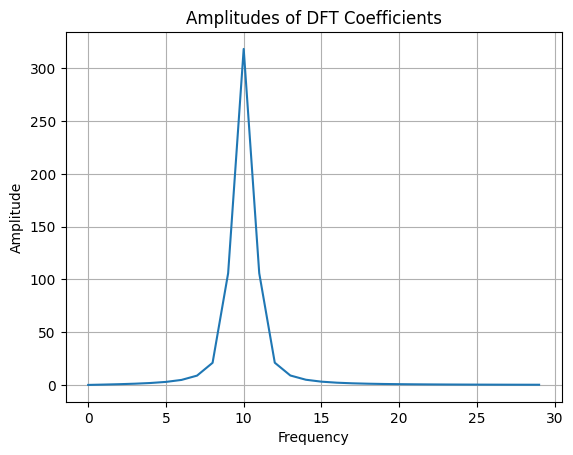

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from cmath import exp,pi

# Define the Discrete Fourier Transform, following the code from the lecture notes, FFT was used
def DFT(y):
    N = len(y)
    c = np.zeros(N//2+1, complex)           # Initialise the list of coefficients,
    for k in range(N//2 + 1):               # solve the value of each coefficient
        for n in range(N):                  # by summing through all the fourier terms
            c[k] += y[n]*exp(-2j*pi*k*n/N)
    return c

# Define the modulated signal y_n
def y_n(N):
    n = np.arange(N)                        # Initialise the array of time values
    return np.sin(np.pi * n / N) * np.sin(20 * np.pi * n / N)

# Plot the amplitudes of the coefficients
plt.plot(np.abs(DFT(y_n(1000)))[0:30])
# Only plotted the first 30 coefficients as all the relevant features are found in the first few

plt.title('Amplitudes of DFT Coefficients')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


**Interpretation**

We note that the theoretical fourier coefficient plot of a product of 2 sine waves should be two spikes. However, since our specific wave has period at $\frac{(10±1)}{2}$ or 9.5 and 10.5, which are not integers, a DFT does not accurately represent such being limited to integers.

The consequence of such is the envelope peaking at 10, as this is the closest to both 9.5 and 10.5, integers in proximity to 10 also have non-zero values as they are close to one the theoretical 9.5, 10.5 periods as well.

### PROBLEM 2

**Fourier filtering**

For this problem, you will use data from a text file called $\tt dow.txt$. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

First, you need to make a copy of the file $\tt dow.txt$ and save it to a folder in your **own Google Drive**. This file is available from the AP155 Course Pack Google Drive (in the Course Pack > Datasets folder).

The code cells below will (1) mount Google Drive and (2) load the data from your Google Drive. Follow the instructions below to load the data. Then, do the following:

1. Plot the data on a graph. *(10 pts.)*

2. Calculate the coefficients of the discrete Fourier transform of the data using the function $\tt rfft$ from numpy's $\tt fft$ library, which produces an array of $\frac{1}{2}N +1$ complex numbers. *(20 pts.)*

3. Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%). *(10 pts.)*

4. Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function $\tt irfft$, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero? *(30 pts.)*

Mount the Google Drive where you saved the file $\tt dow.txt$.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [7]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [ ]:
!ls drive/My\ Drive/

'117 LE 3.docx'
 14.png
'[2324B] Telescope Assembly Practicals Schedule.gsheet'
'[2324B] Telescope Assembly Practicals Scoring Sheet.gsheet'
'AP181 opamps II'
 bio
 book.zip
 Classroom
'Colab Notebooks'
 Creation.png
'Darwin James Tangonan - Mema no.1 .gdoc'
'Darwin James Tangonan - Mema no.4.gdoc'
 Digital-3_ap181_2024.pdf
'ELIMS ROUND 26 SOLN.gsheet'
'Fil 40'
'FORM5_2022-08539-1st Sem 22-23.pdf'
'FORM5_2022-08539-2nd Sem 22-23.pdf'
'heat engine rnd.gdoc'
'M40 matrix dump.gsheet'
 Nightlight3render.webp
'Obsin #1.txt'
 p6
'PAR-Q (1).pdf'
 PAR-Q.pdf
'PE INT-THC files'
'Pendulum rnd.gdoc'
'PE RFA AY23S1'
'PE rf payment.jpg'
 philo
 pic.jpg
'sample calculations.gdoc'
 signature1.jpg
 Spider-Man.Across.The.Spider-Verse.2023.1080p.WEB-DL.DDP5.1.Atmos.x264-AOC.mkv
'Ss1 tweets (1).pdf'
'Ss1 tweets.gdoc'
'Ss1 tweets.pdf'
'Subscription Tangonan.png'
 tangonanID.jpg
'Tangonan - ISKOLARO 2023 - WAIVER AND MEDIA CONSENT FORM.gdoc'
'Tangonan - ISKOLARO 2023 - WAIVER AND MEDIA CONSENT FORM.pdf'
 ta

Define the directory path to the location of the file $\tt dow.

---

txt$, i.e. if it is in a folder named "AP155" under My Drive, then the file path will be "/content/drive/My Drive/AP155". Change the string variable in the code cell below, as needed:

In [8]:
file_path = "/content/drive/My Drive/Colab Notebooks/"

Use numpy's $\tt loadtxt$ function ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)) to load the $\tt dow.txt$ file and save the data into a numpy array named $\tt dow$.

In [9]:
import numpy as np
dow = np.loadtxt(file_path+"dow.txt")

Print out the first 10 elements of the array $\tt dow$. Check that you get the ff. output:
```
array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85, 12331.6 , 12309.25, 12278.41, 12307.48])
```

In [10]:
dow[0:10]

array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85,
       12331.6 , 12309.25, 12278.41, 12307.48])

Now you can start to write code for this problem!

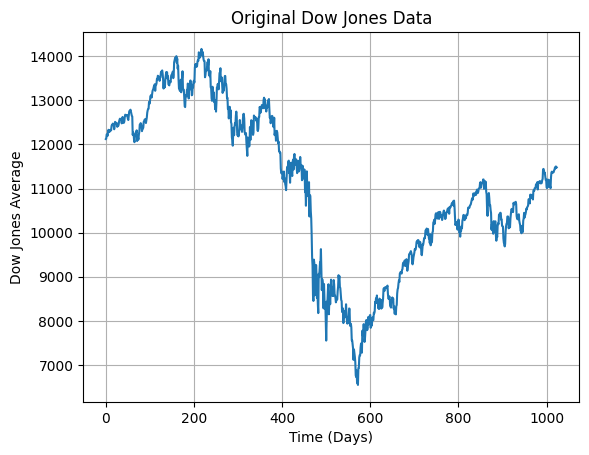

1024 513


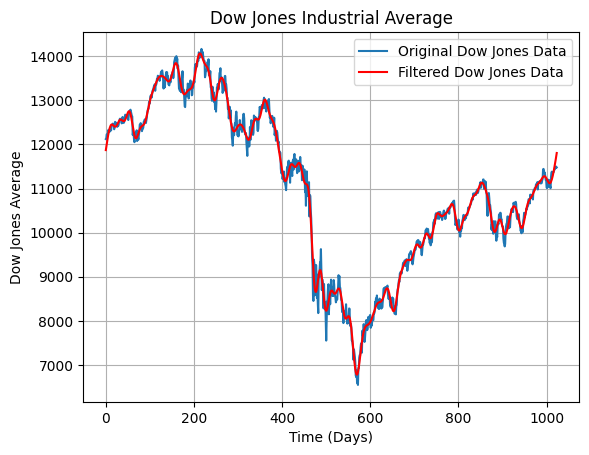

In [23]:
from numpy.fft import rfft, irfft

# Plot the data on a graph.
plt.plot(dow)
plt.xlabel('Time (Days)')
plt.ylabel('Dow Jones Average')
plt.title('Original Dow Jones Data')
plt.grid(True)
plt.show()

# Calculate the coefficients of the discrete Fourier transform.
coeff = rfft(dow)
print(len(dow), len(coeff)) # 1024, 513, N/2 + 1 length as expected

# Set all but the first 10% of the elements to zero.
cutoff = int(0.1 * len(coeff))              # determine the length of the array
coeff_new = np.copy(coeff)                  # create a copy of the coeffiecients
coeff_new[cutoff:] = 0                      # set all those after the cutoff to 0

# Calculate the inverse Fourier transform
dow_new = irfft(coeff_new)             # Calculate the new datapoints via inverse fourier

# Plotting, both the original data (dow), and new data (data_new)
plt.plot(dow, label='Original Dow Jones Data')
plt.plot(dow_new, label='Filtered Dow Jones Data', color='red')
plt.xlabel('Time (Days)')
plt.ylabel('Dow Jones Average')
plt.title('Dow Jones Industrial Average')
plt.grid(True)
plt.legend()
plt.show()

**Analysis**

The new data appears smoother than the original data. This makes sense as the last 90% of coefficients represent the thinner looking higher frequency waves, which can be interpreted as the finer details of the curve.

Setting these coefficients to 0 removes all the smaller details due to these finer waves and overall smoothens the final plot.

This could be interpreted as a moving average, which could represent overall value of a stock in that week (or month) instead of just several months.